# Visualização de Dados

In [21]:
import pandas as pd

In [22]:
df1 = pd.read_excel("./datasets/Aracaju.xlsx")
df2 = pd.read_excel("./datasets/Fortaleza.xlsx")
df3 = pd.read_excel("./datasets/Natal.xlsx")
df4 = pd.read_excel("./datasets/Recife.xlsx")
df5 = pd.read_excel("./datasets/Salvador.xlsx")

In [23]:
df = pd.concat([df1, df2, df3, df4, df5])

In [24]:
df.dropna(subset=["Vendas"], inplace=True)

In [25]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [26]:
#Retorna a qunatidade de ocorrencia de tal coluna em ordem decrescente
df["LojaID"].value_counts(ascending=False)

1036    116
1035    112
1037    100
1034     66
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
854      28
1523     28
1004     27
853      25
1521     21
1003     19
Name: LojaID, dtype: int64

<AxesSubplot: >

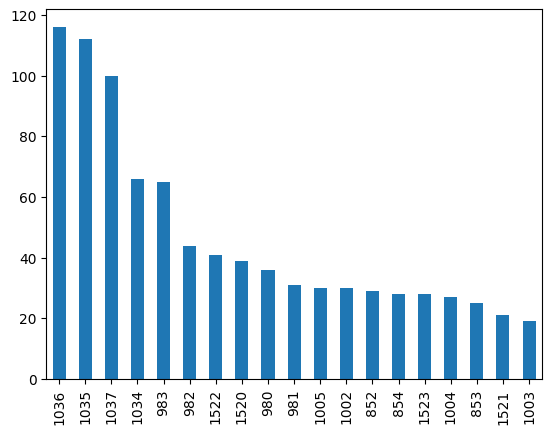

In [27]:
#Plotando um gráfico em barras verticais
df["LojaID"].value_counts(ascending=False).plot.bar()

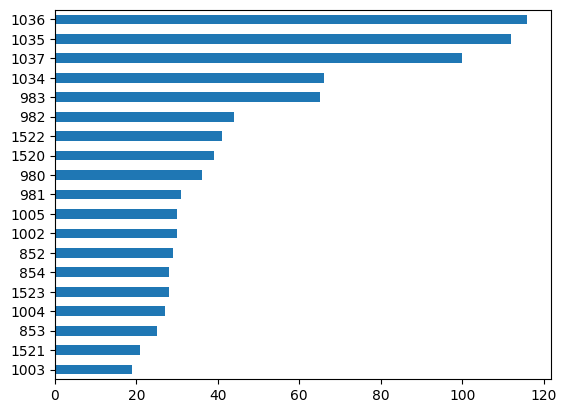

In [28]:
#Plotando um gráfico em barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot: ylabel='Vendas'>

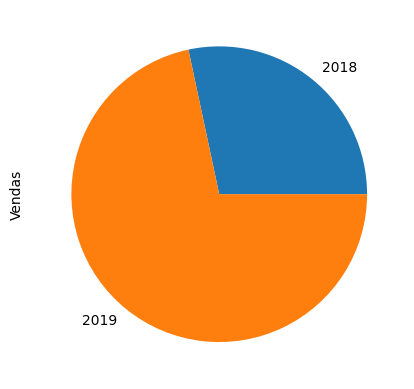

In [29]:
#Gráfico em pizza das vendas sobre os anos de 2019 e 2018
df.groupby(df["Data"].dt.year)["Vendas"].sum().plot.pie()

In [33]:
#Melhorando as plotagens
import matplotlib.pyplot as plt

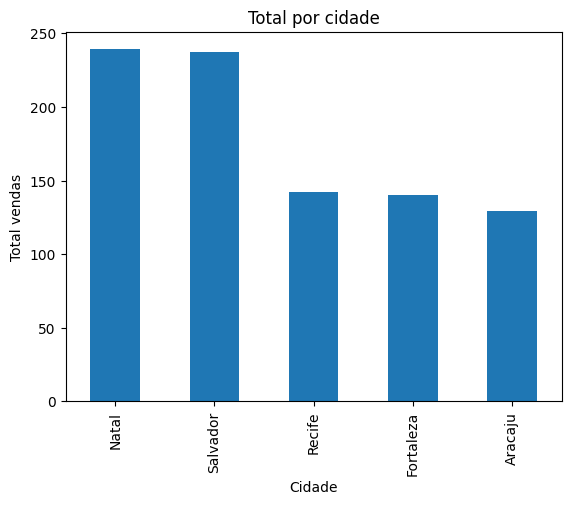

In [36]:
#Adicionando titulo e nome aos eixos x e y
df["Cidade"].value_counts(ascending=False).plot.bar(title = "Total por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

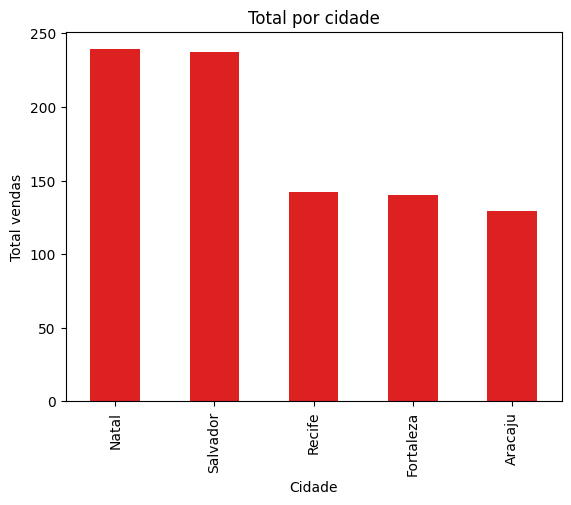

In [38]:
#Adicionando titulo e nome aos eixos x e y e mudando a cor
df["Cidade"].value_counts(ascending=False).plot.bar(title = "Total por cidade", color="#DD2121")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [42]:
#Estilizando o gráfico (Consultar a documentação da biblioteca matplotlib)
plt.style.use("seaborn-v0_8-dark-palette")

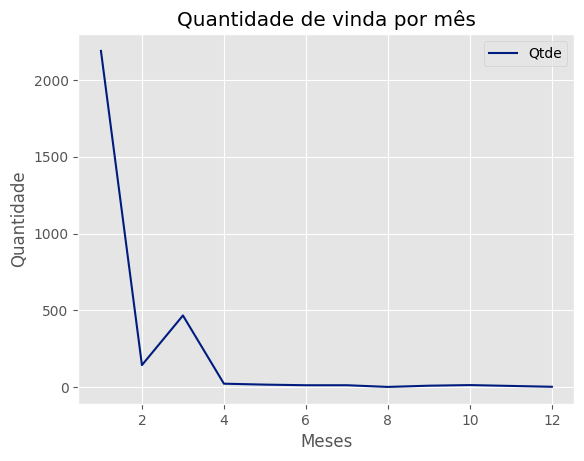

In [43]:
df.groupby(df["Data"].dt.month)["Qtde"].sum().plot.line(title="Quantidade de vinda por mês")
plt.xlabel("Meses")
plt.ylabel("Quantidade")
plt.legend()

In [45]:
#Selecionando apenas quantidade de vendas por ano
vendas_por_ano = df[df["Data"].dt.year == 2019]
vendas_por_ano.head()

,Cidade,Data,Vendas,LojaID,Qtde
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3
10,Aracaju,2019-01-01,42.34,1522,6
11,Aracaju,2019-01-01,161.53,1520,4


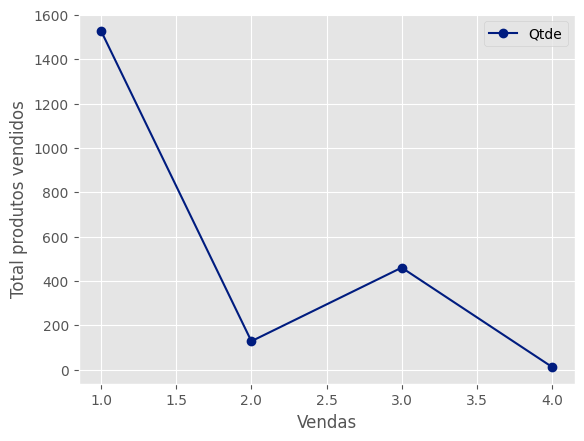

In [48]:
#Plotando o grafico
vendas_por_ano.groupby(vendas_por_ano["Data"].dt.month)["Qtde"].sum().plot.line(marker = "o")
plt.xlabel("Vendas")
plt.ylabel("Total produtos vendidos")
plt.legend();

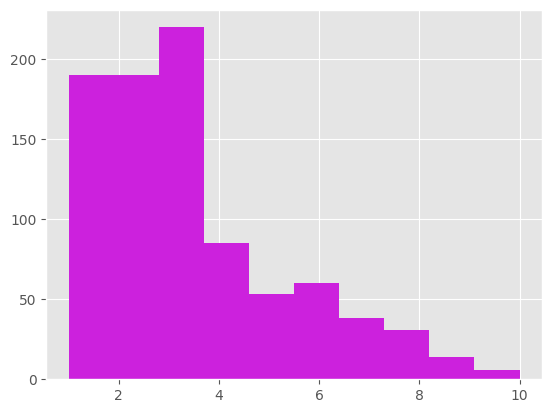

In [50]:
#Plotando gráfico de histograma de quantidade
plt.hist(df["Qtde"], color = "#cc21dd");

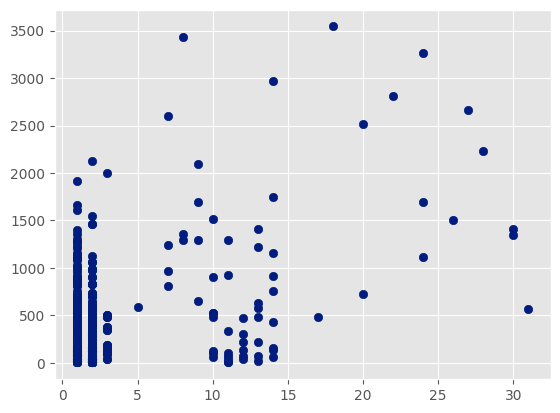

In [51]:
#Gráfico de  disperção
plt.scatter(x=vendas_por_ano["Data"].dt.day, y=(vendas_por_ano["Vendas"] * vendas_por_ano["Qtde"]));

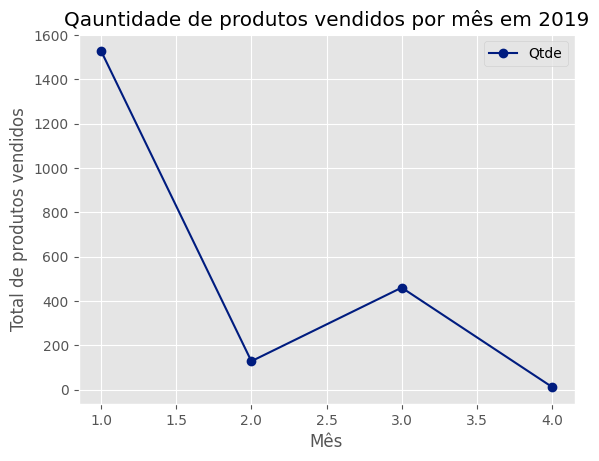

In [56]:
#Salvando o gráfico em imagem
vendas_por_ano.groupby(vendas_por_ano["Data"].dt.month)["Qtde"].sum().plot.line(marker = "o")
plt.title("Qauntidade de produtos vendidos por mês em 2019")
plt.ylabel("Total de produtos vendidos")
plt.xlabel("Mês")
plt.legend()
plt.savefig("grafico_QTDE_X_MES.jpeg");